In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG.csv', encoding='latin-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [96]:
df.groupby('Element')[['Y2014','Y2016','Y2015']].sum()

,Y2014,Y2016,Y2015
Element,,,
Domestic supply quantity,1996716.35,2044842.70,2021493.55
Export Quantity,150020.64,151920.46,157614.47
Fat supply quantity (g/capita/day),10225.56,10102.77,10235.74
Feed,216927.89,228958.65,225050.22
Food,1212332.49,1247022.17,1232361.10
Food supply (kcal/capita/day),454257.00,451810.00,453383.00
Food supply quantity (kg/capita/yr),49650.63,48985.28,49345.13
Import Quantity,274144.48,286582.78,267018.46
Losses,153223.00,157787.00,155439.00


In [82]:
df.Item.value_counts()

Milk - Excluding Butter     1262
Eggs                        1142
Miscellaneous                911
Cereals - Excluding Beer     714
Oilcrops                     706
                            ... 
Grand Total                  135
Animal Products              135
Vegetal Products             135
Sugar non-centrifugal        121
Population                    90
Name: Item, Length: 119, dtype: int64

In [81]:
df.query("Area == 'Algeria'").Y2018.sum()

341729.98000000004

In [77]:
df.groupby('Element')['Y2014'].sum().max()

1996716.35

In [63]:
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


<AxesSubplot:>

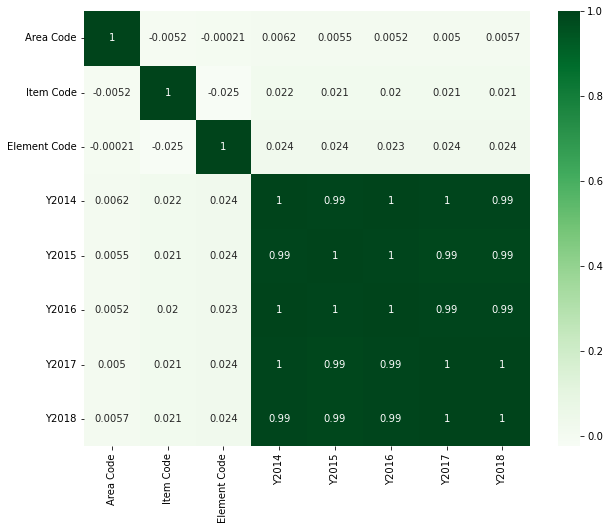

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Greens',annot=True)

In [65]:
df.Y2016.isnull().sum(),df.Y2016.isnull().sum()/len(df)*100

(1535, 2.5187470259094566)

In [62]:
df.groupby('Item')['Y2014','Y2017'].sum()

C:\Users\d\AppData\Local\Temp\ipykernel_12508\3346466942.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Item')['Y2014','Y2017'].sum()


,Y2014,Y2017
Item,,
"Alcohol, Non-Food",2403.00,2348.00
Alcoholic Beverages,102410.11,95581.06
Animal Products,11935.65,11547.65
Animal fats,209460.54,269617.53
Apples and products,9499.23,10198.90
...,...,...
"Vegetables, Other",155038.96,157752.59
Vegetal Products,107145.19,107655.20
Wheat and products,232670.13,240047.62


In [5]:
help(df.melt)

Help on method melt in module pandas.core.frame:

melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level: 'Level | None' = None, ignore_index: 'bool' = True) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' 

In [14]:
id = ['Area Code','Area','Item Code','Item','Element Code','Element','Unit']
df1 = pd.melt(df, id_vars=id, value_vars=['Y2014','Y2015','Y2016','Y2017','Y2018'], var_name='Year', value_name='Amount')
df1.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Year,Amount
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,Y2014,38924.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,Y2014,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,Y2014,3377.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,Y2014,94.90
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,Y2014,80.06


In [72]:
df1.groupby('Year')['Amount'].sum()

Year
2014    7965086.13
2015    8032340.23
2016    8112472.65
2017    8375729.19
2018    8554629.96
Name: Amount, dtype: float64

In [15]:
#info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304715 entries, 0 to 304714
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     304715 non-null  int64  
 1   Area          304715 non-null  object 
 2   Item Code     304715 non-null  int64  
 3   Item          304715 non-null  object 
 4   Element Code  304715 non-null  int64  
 5   Element       304715 non-null  object 
 6   Unit          304715 non-null  object 
 7   Year          304715 non-null  object 
 8   Amount        297101 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 20.9+ MB


In [24]:
df1.describe()

,Area Code,Item Code,Element Code,Amount
count,304715.000000,304715.000000,304715.000000,297101.000000
mean,134.265576,2687.176706,3814.856456,138.135712
std,72.605232,146.054780,2211.992515,1639.546794
min,4.000000,2501.000000,511.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.080000
75%,195.000000,2775.000000,5511.000000,8.900000
max,276.000000,2961.000000,5911.000000,195875.000000


In [18]:
df1.Amount.isnull().sum(), round(df1.Amount.isnull().sum()/len(df1)*100,2)

(7614, 2.5)

In [22]:
df1.Amount.value_counts()[0]/len(df1)*100

42.483632246525445

> 42% are zeros

<AxesSubplot:>

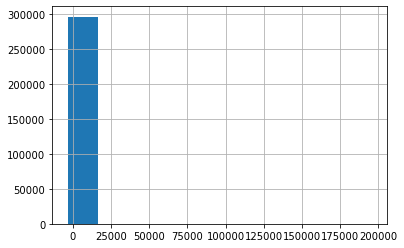

In [19]:
df1.Amount.hist()

In [23]:
#clean Year
df1.Year = df1.Year.str.replace('Y','')
df1.Year

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
304710    2018
304711    2018
304712    2018
304713    2018
304714    2018
Name: Year, Length: 304715, dtype: object

In [26]:
#duplicates
df1.duplicated().any()

False

In [27]:
df1.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Year', 'Amount'],
      dtype='object')

In [29]:
df1['Area'].value_counts()

Kenya                          7800
Egypt                          7440
Nigeria                        7370
Côte d'Ivoire                  7335
Senegal                        7310
Cameroon                       7300
Uganda                         7290
Zambia                         7255
Malawi                         7235
Ethiopia                       7235
Madagascar                     7195
Mozambique                     7135
Rwanda                         7130
Angola                         7120
United Republic of Tanzania    7095
Congo                          7065
Guinea                         7050
Burkina Faso                   7045
Niger                          7015
South Africa                   6995
Zimbabwe                       6965
Morocco                        6965
Mauritius                      6890
Botswana                       6890
Ghana                          6770
Central African Republic       6720
Chad                           6715
Tunisia                     

In [30]:
df1.Item.value_counts()

Milk - Excluding Butter     6310
Eggs                        5710
Miscellaneous               4555
Cereals - Excluding Beer    3570
Oilcrops                    3530
                            ... 
Grand Total                  675
Animal Products              675
Vegetal Products             675
Sugar non-centrifugal        605
Population                   450
Name: Item, Length: 119, dtype: int64

In [ ]:
df1.groupby('Item')[].sum()

In [34]:
df1.Element.value_counts().plot(kind='barh')

AttributeError: 'Series' object has no attribute 'sort_by'

In [36]:
lst = [[35, 'Portugal', 94], [33, 'Argentina', 93], [30 , 'Brazil', 92]]
col = ['Age','Nationality','Overall']

In [37]:
pd.DataFrame(lst, columns=col, index=[1,2,3])

,Age,Nationality,Overall
1,35,Portugal,94
2,33,Argentina,93
3,30,Brazil,92


In [38]:
pd.DataFrame(lst, column=['Age','Nationality','Overall'], index=[1,2,3])

TypeError: __init__() got an unexpected keyword argument 'column'

In [41]:
pd.DataFrame(lst, columns=col, index=[i for i in range(1,4)])

,Age,Nationality,Overall
1,35,Portugal,94
2,33,Argentina,93
3,30,Brazil,92


In [45]:
arr  = np.array([[94, 89, 63],

             [93, 92, 48],

             [92, 94, 56]])



In [46]:
arr

array([[94, 89, 63],
       [93, 92, 48],
       [92, 94, 56]])

In [47]:
arr[1:,:]

array([[93, 92, 48],
       [92, 94, 56]])

In [48]:
arr[:1,1:]

array([[89, 63]])

In [49]:
arr[:2,1:]

array([[89, 63],
       [92, 48]])

In [50]:
arr[:1,1:]

array([[89, 63]])

In [51]:
arr[:2,0:]

array([[94, 89, 63],
       [93, 92, 48]])

In [52]:
S = [['him', 'sell'], [90, 28, 43]]
S[0][1][1]

'e'

In [54]:
my_tuppy = (1,2,5,8)
my_tuppy[2]=3

TypeError: 'tuple' object does not support item assignment

In [55]:
y = [(2, 4), (7, 8), (1, 5, 9)]

In [56]:
y[1][-1]

8

In [57]:
y[1][1]

8

In [59]:
df1.loc(1,3)

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

In [61]:
df.iloc(:)

SyntaxError: invalid syntax (3325716275.py, line 1)